In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
# Replace 'air_quality.csv' with the actual path to your dataset
data = pd.read_csv('AQI-and-Lat-Long-of-Countries.csv')

# Explore the dataset
print(data)

       AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0             51             1               36              0   
1             41             1                5              1   
2             41             1                5              1   
3             66             1               39              2   
4             34             1               34              0   
...          ...           ...              ...            ...   
16690         54             1               34              5   
16691         71             1               39              1   
16692         71             1               39              1   
16693         50             1               20              5   
16694         71             1               44              2   

       PM2.5 AQI Value      lat      lng  
0                   51  44.7444  44.2031  
1                   41  -5.2900 -44.4900  
2                   41 -11.2958 -41.9869  
3                   66  37.1667  15

In [4]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [5]:
data.shape

(16695, 7)

In [6]:
print(data.isnull().sum())

AQI Value          0
CO AQI Value       0
Ozone AQI Value    0
NO2 AQI Value      0
PM2.5 AQI Value    0
lat                0
lng                0
dtype: int64


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('AQI-and-Lat-Long-of-Countries.csv')
X = df.drop(columns=['AQI Value'])
y = df['AQI Value']

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the features (X)
X_scaled = scaler.fit_transform(X)

# Print scaled data
print(X_scaled)


[[-0.14428253  0.18532807 -0.64954443 -0.20416421  0.63090751  0.65924024]
 [-0.14428253 -1.17201959 -0.47949089 -0.43560817 -1.54955316 -0.55515215]
 [-0.14428253 -1.17201959 -0.47949089 -0.43560817 -1.81128131 -0.52087952]
 ...
 [-0.14428253  0.31668429 -0.47949089  0.25872371  0.26458486 -1.16255029]
 [-0.14428253 -0.51523846  0.20072327 -0.22730861  0.80671485  0.08537123]
 [-0.14428253  0.53561133 -0.30943735  0.25872371  0.42955839 -1.0813522 ]]


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions
y_pred = model.predict(X_test)

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")

# Optional: Check model accuracy using correlation between actual and predicted values
accuracy = np.corrcoef(y_test, y_pred)[0, 1] * 100
print(f"Model Accuracy (Correlation-based): {accuracy:.2f}%")

Mean Squared Error (MSE): 41.797808105382074
Root Mean Squared Error (RMSE): 6.465122435451789
Mean Absolute Error (MAE): 4.126360949132347
R-squared (R2 Score): 0.9747980672314599
Model Accuracy (Correlation-based): 98.74%


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data_path = "AQI-and-Lat-Long-of-Countries.csv" # Assuming the file is in the colab environment
data = pd.read_csv(data_path)

# Preview dataset
print("Dataset preview:")
print(data.head())

# Preprocessing
target_column = "AQI Value"
X = data.drop(columns=[target_column])
y = data[target_column]

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the AdaBoostRegressor model
model = AdaBoostRegressor(random_state=42) #You can tune hyperparameters here
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2 Score): {r2}")

# Optional: Check model accuracy using correlation between actual and predicted values
accuracy = np.corrcoef(y_test, y_pred)[0, 1] * 100
print(f"Model Accuracy (Correlation-based): {accuracy:.2f}%")

Dataset preview:
   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0         51             1               36              0               51   
1         41             1                5              1               41   
2         41             1                5              1               41   
3         66             1               39              2               66   
4         34             1               34              0               20   

       lat      lng  
0  44.7444  44.2031  
1  -5.2900 -44.4900  
2 -11.2958 -41.9869  
3  37.1667  15.1833  
4  53.0167  20.8833  
Mean Squared Error (MSE): 145.9274880557116
Root Mean Squared Error (RMSE): 12.080045035334578
Mean Absolute Error (MAE): 9.373013940100497
R-squared (R2 Score): 0.9120132152913437
Model Accuracy (Correlation-based): 95.68%


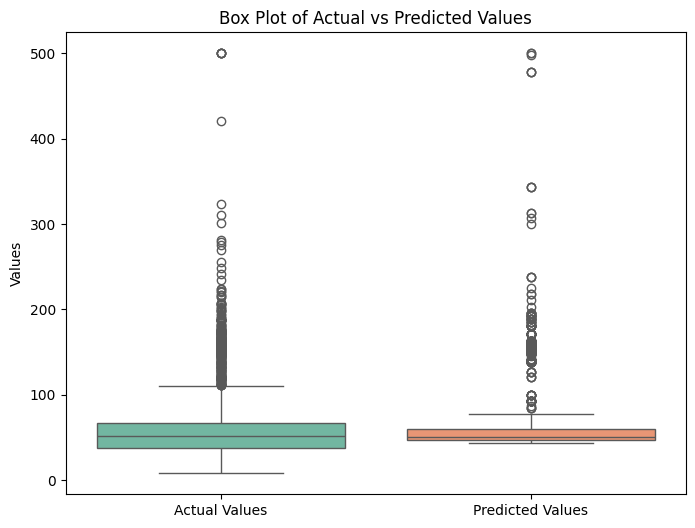

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

# Combine actual and predicted values into a DataFrame for comparison
comparison = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

# Box Plot for Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.boxplot(data=comparison, palette="Set2")
plt.title('Box Plot of Actual vs Predicted Values')
plt.ylabel('Values')
plt.show()

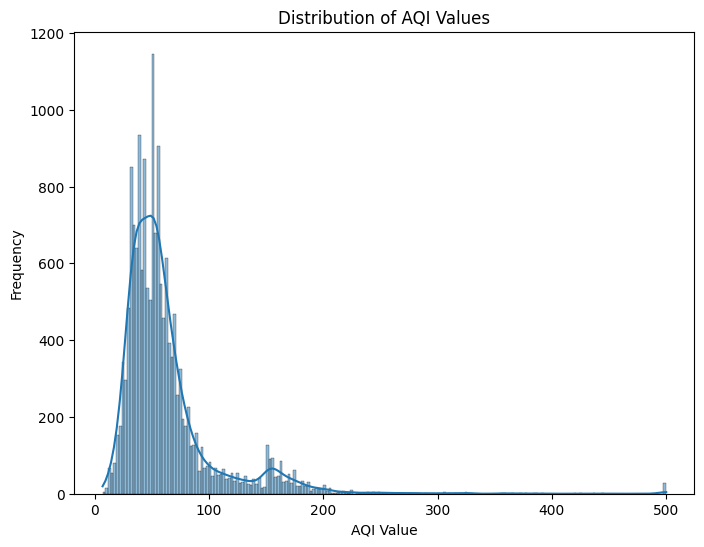

In [13]:
# Histogram of AQI values
plt.figure(figsize=(8, 6))
sns.histplot(data['AQI Value'], kde=True)
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.title("Distribution of AQI Values")
plt.show()

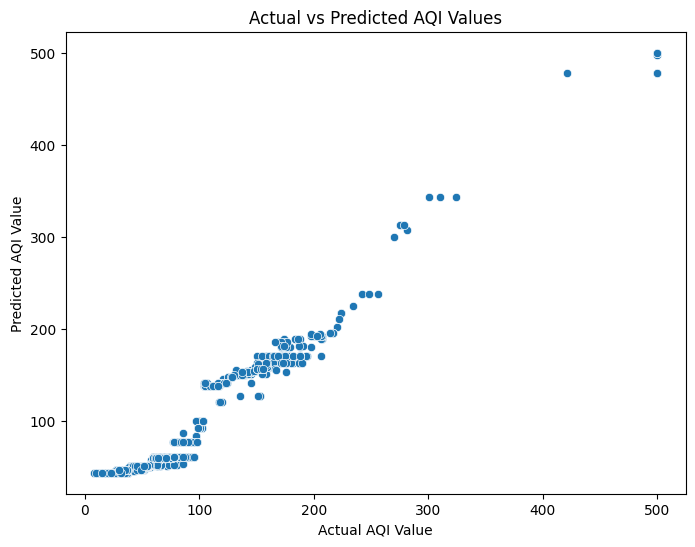

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual AQI Value")
plt.ylabel("Predicted AQI Value")
plt.title("Actual vs Predicted AQI Values")
plt.show()

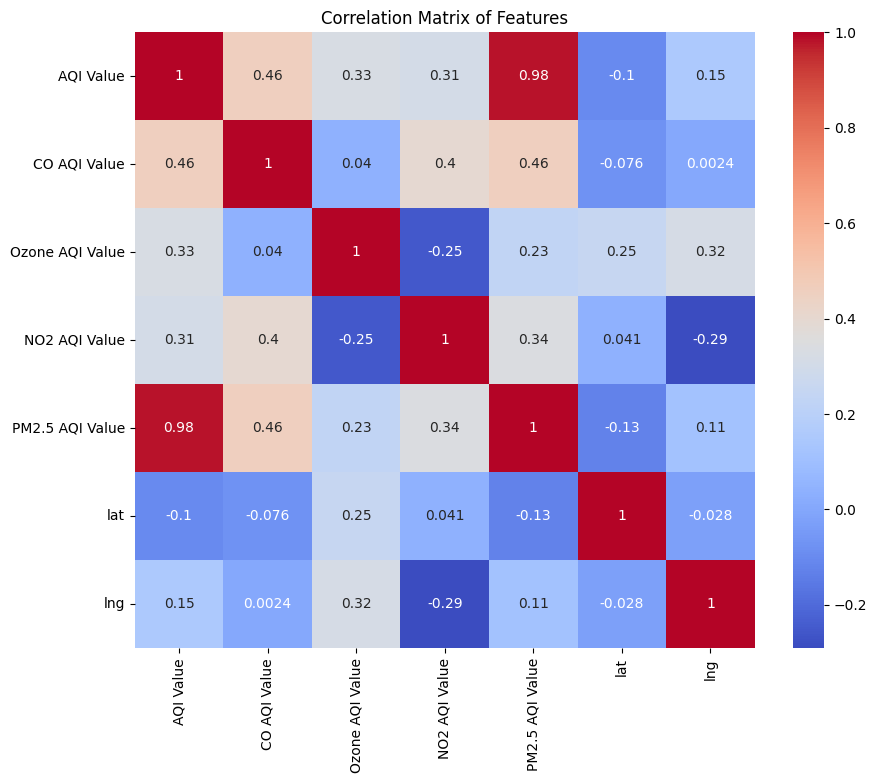

In [15]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()